In [2]:
#Forecasting Time Series Using Facebook Fbprophet

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet

In [82]:
df = pd.read_csv("monthly-milk-production-pounds.csv")

In [83]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [84]:
df.columns=['ds','y'] #renaming as per fbprophet

In [85]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [86]:
df = df.dropna()

In [87]:
df['ds'] = pd.to_datetime(df['ds'])

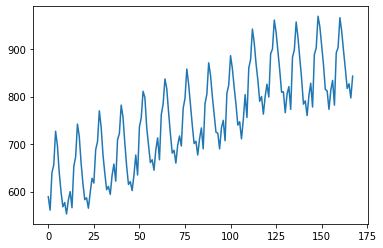

In [88]:
df['y'].plot()

In [89]:
#df['y']=df['y'] - df['y'].shift(1) #Not shifting since prophet seems to handle shift

In [90]:
from fbprophet import Prophet

In [91]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [92]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [93]:
# Initialize model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [95]:
# Creating future dates for prediction
future_dates = model.make_future_dataframe(periods= 365) #create additional 365 days appending current df

In [96]:
future_dates 

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [97]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [98]:
#Prediction
prediction = model.predict(future_dates)

In [99]:
prediction.head()
#yhat_lower = predicted lower value
#yhat_upper = predicted upper value
#yhat is predicted value

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.810747,577.309800,596.670687,606.810747,606.810747,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,0.0,0.0,0.0,586.697151
1,1962-02-01,608.536993,535.913922,556.132375,608.536993,608.536993,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,0.0,0.0,0.0,545.999137
2,1962-03-01,610.096182,631.179462,651.880033,610.096182,610.096182,31.410418,31.410418,31.410418,31.410418,31.410418,31.410418,0.0,0.0,0.0,641.506601
3,1962-04-01,611.822427,648.440216,667.710999,611.822427,611.822427,46.733066,46.733066,46.733066,46.733066,46.733066,46.733066,0.0,0.0,0.0,658.555494
4,1962-05-01,613.492987,711.760874,731.001622,613.492987,613.492987,108.064296,108.064296,108.064296,108.064296,108.064296,108.064296,0.0,0.0,0.0,721.557284


In [100]:
prediction[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.697151,577.309800,596.670687
1,1962-02-01,545.999137,535.913922,556.132375
2,1962-03-01,641.506601,631.179462,651.880033
3,1962-04-01,658.555494,648.440216,667.710999
4,1962-05-01,721.557284,711.760874,731.001622
...,...,...,...,...
528,1976-11-26,815.561801,804.293570,826.744631
529,1976-11-27,818.770979,807.434268,829.865113
530,1976-11-28,822.159021,810.655365,832.754390
531,1976-11-29,825.663235,813.285322,836.695632


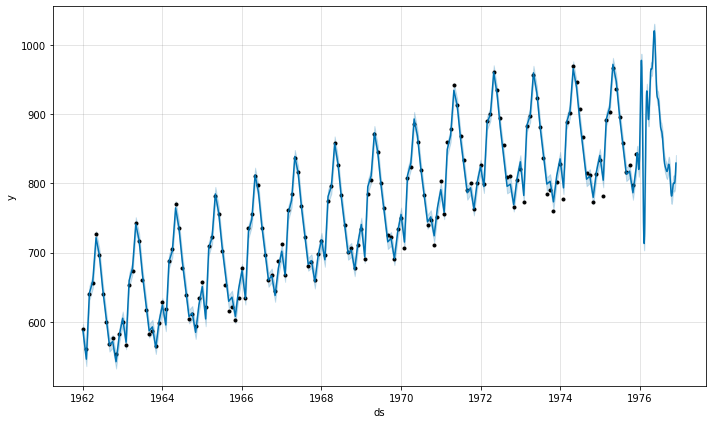

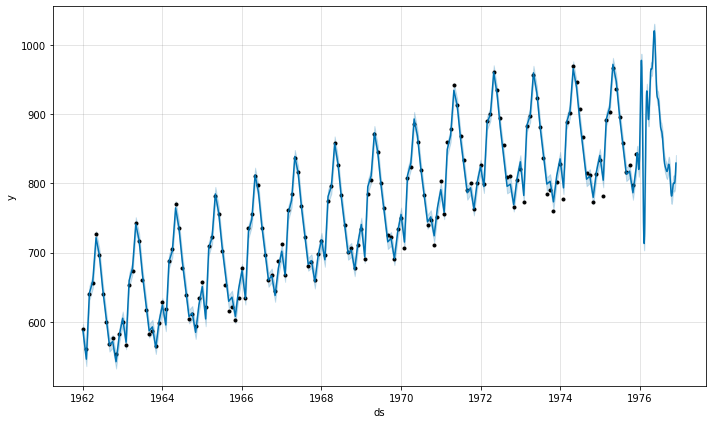

In [101]:
#Plot predicted projection
model.plot(prediction)
#Black points = real data


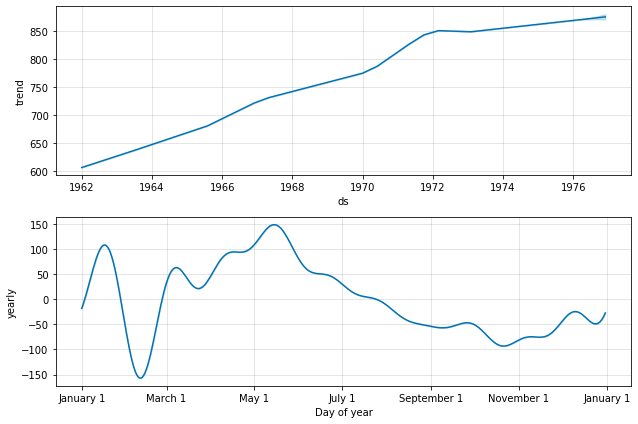

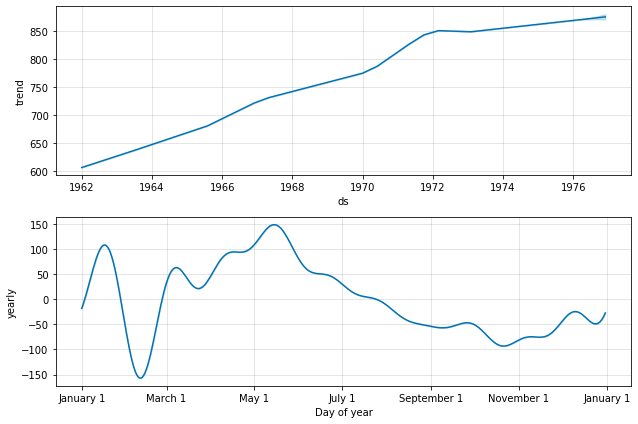

In [102]:
#visualize each components[Trends,Weekly]
model.plot_components(prediction)

# Cross Validation

In [103]:
# Cross Validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon= '365 days',period = '180 days',initial = '1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [104]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,629.706391,628.530992,631.345623,622.0,1965-01-22
1,1965-03-01,712.739970,707.227751,717.961941,709.0,1965-01-22
2,1965-04-01,731.118164,719.501082,742.381469,722.0,1965-01-22
3,1965-05-01,800.091760,782.058218,818.187965,782.0,1965-01-22
4,1965-06-01,768.349331,742.334982,794.531657,756.0,1965-01-22


### Performance Metrics

In [107]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,254.213828,15.944084,12.426328,0.015982,0.013692,0.36
1,41 days,252.292064,15.883704,12.348837,0.015919,0.013692,0.36
2,42 days,267.463848,16.354322,12.817196,0.016570,0.014528,0.36
3,43 days,268.236328,16.377922,12.952623,0.016783,0.014528,0.36
4,46 days,253.593855,15.924630,12.602717,0.016295,0.014528,0.36


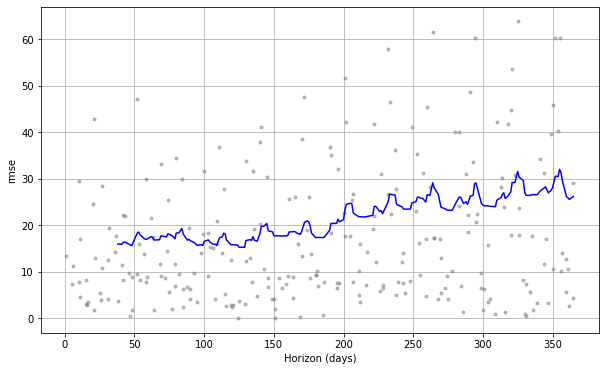

In [109]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse') #root mean sq error

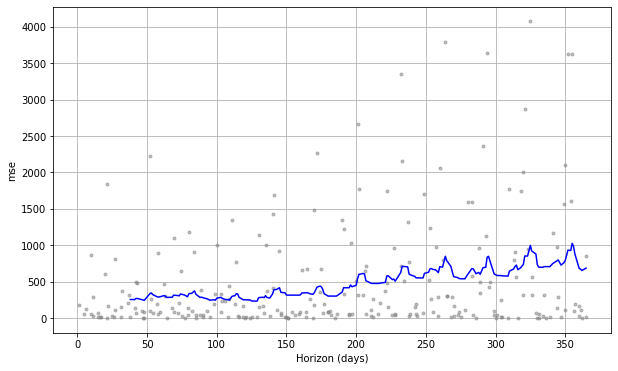

In [110]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse') #mean sq error

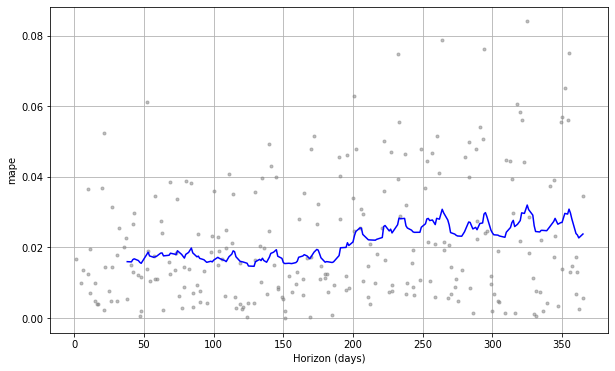

In [111]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mape') #mean abs perc error